In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load Data

In [2]:
df = pd.read_csv("uci-secom.csv")
df.shape

(1567, 592)

In [3]:
df.head(2)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [6]:
df["Pass/Fail"].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [7]:
label_name = "Pass/Fail"
label_one_count = (df[label_name] == 1).sum()
label_one_count

104

In [8]:
df_label_not_one = df[df[label_name] == -1].sample(label_one_count)

df_under = pd.concat([df_label_not_one,  df[df[label_name] == 1]])
df_under.shape

(208, 592)

In [9]:
df_under[label_name].value_counts()

Pass/Fail
-1    104
 1    104
Name: count, dtype: int64

In [10]:
X, y = df_under.drop(columns=[label_name, "Time"]), df_under[label_name]
X.shape, y.shape

((208, 590), (208,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42)

In [12]:
cat_col = X.select_dtypes(exclude="number").columns
print(cat_col)
X_train[cat_col] = X_train[cat_col].astype("category")
X_test[cat_col] = X_test[cat_col].astype("category")

Index([], dtype='object')


## LightGBM

In [13]:
import lightgbm 
        
model_lgbm = lightgbm.LGBMClassifier(boosting_type='goss', 
                                    n_estimators=1000, max_depth=3,
                                    early_stopping_rounds=10,
                                    n_jobs=-1,
                                    learning_rate=0.01, random_state=42)
model_lgbm

LGBMClassifier(boosting_type='goss', early_stopping_rounds=10,
               learning_rate=0.01, max_depth=3, n_estimators=1000,
               random_state=42)

In [14]:
# fit & predict
model_lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)],
        callbacks=[lightgbm.log_evaluation(1)])

[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[1]	valid_0's binary_logloss: 0.691813
[2]	valid_0's binary_logloss: 0.691598
[3]	valid_0's binary_logloss: 0.690082
[4]	valid_0's binary_logloss: 0.690133
[5]	valid_0's binary_logloss: 0.690377
[6]	valid_0's binary_logloss: 0.689933
[7]	valid_0's binary_logloss: 0.688816
[8]	valid_0's binary_logloss: 0.688693
[9]	valid_0's binary_logloss: 0.68763
[10]	valid_0's binary_logloss: 0.687841
[11]	valid_0's binary_logloss: 0.686669
[12]	valid_0's binary_logloss: 0.685614
[13]	valid_0's binary_logloss: 0.68407
[14]	valid_0's binary_logloss: 0.683434
[15]	valid_0's binary_logloss: 0.683443
[16]	valid_0's binary_logloss: 0.682534
[17]	valid_0's binary_logloss: 0.682623
[18]	valid_0's binary_logloss: 0.683064
[19]	valid_0's binary_logloss: 0.683695
[20]	valid_0's binary_logloss: 0.683557
[21]	valid_0's binary_logloss: 0.683713
[22]	valid_0's binary_logloss: 0.6824

LGBMClassifier(boosting_type='goss', early_stopping_rounds=10,
               learning_rate=0.01, max_depth=3, n_estimators=1000,
               random_state=42)

In [15]:
model_lgbm.best_score_

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('binary_logloss', 0.6688729952563452)])})

In [16]:
model_lgbm.score(X_test, y_test)

0.6190476190476191

In [17]:
fi = pd.Series(model_lgbm.feature_importances_)
fi.index = model_lgbm.feature_name_
fi.nlargest(10)

59     57
100    30
129    15
486    14
55     11
175    11
160    10
152     9
491     8
75      7
dtype: int32

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

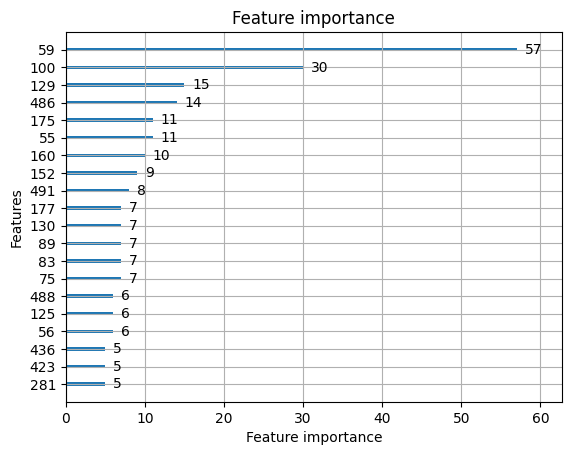

In [18]:
lightgbm.plot_importance(model_lgbm, max_num_features=20)